In [1]:
import csv
import math
import networkx as nx
import matplotlib
import pandas as pd

%matplotlib inline

#import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

#### looking at data that examines the strength of the association between directors and the actors they employ, weighted by the gross earnings of the films. We will see which actors have strong assoications with each other through the directors they work with and weighted by their success (in dollar terms). The data set is from https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

In [51]:
 

file = "https://raw.githubusercontent.com/bkreis84/Web-Analytics/master/movie_metadata.csv"

df = pd.read_csv(file)

In [3]:
df.head()



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [4]:
g=nx.Graph()

In [52]:
df = df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'gross']]
df = df.dropna()

df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,gross
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,760505847
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,309404152
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,200074175
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,448130642
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,73058679


In [6]:
#create empty lists to store the unique values
directors = []
actors = []

In [7]:
#store non-duplicate values in empty list using the top 3 actors from each film
for row in df['actor_1_name']:
    if row not in actors:
        actors.append(row)

for row in df['actor_2_name']:
    if row not in actors:
        actors.append(row)

for row in df['actor_3_name']:
    if row not in actors:
        actors.append(row)

In [8]:
for row in df['director_name']:
    if row not in directors:
        directors.append(row)

In [9]:
#create the edges between the directors and the top 3 actors, weighted by the gross earnings of the movie
for row in range(len(df)):
    g.add_edge(df.iloc[row]['director_name'], df.iloc[row]['actor_1_name'], weight=df.iloc[row]['gross'])

for row in range(len(df)):
    g.add_edge(df.iloc[row]['director_name'], df.iloc[row]['actor_2_name'], weight=df.iloc[row]['gross'])
    
for row in range(len(df)):
    g.add_edge(df.iloc[row]['director_name'], df.iloc[row]['actor_3_name'], weight=df.iloc[row]['gross'])

In [10]:
# computing an affiliation network of the graphs
actnet=bi.weighted_projected_graph(g, actors, ratio=False)

In [11]:
#find the largest connected component
actnet= list(nx.connected_component_subgraphs(actnet))
actnet = actnet[0]

In [12]:
#plot the network and highlight relationship strength using color and thickness. since the edge value will vary 
#widely (amount of money grossed in box office) we will use the logarithm

weights=[math.log(edata['weight']) for f, t, edata in actnet.edges(data=True)]

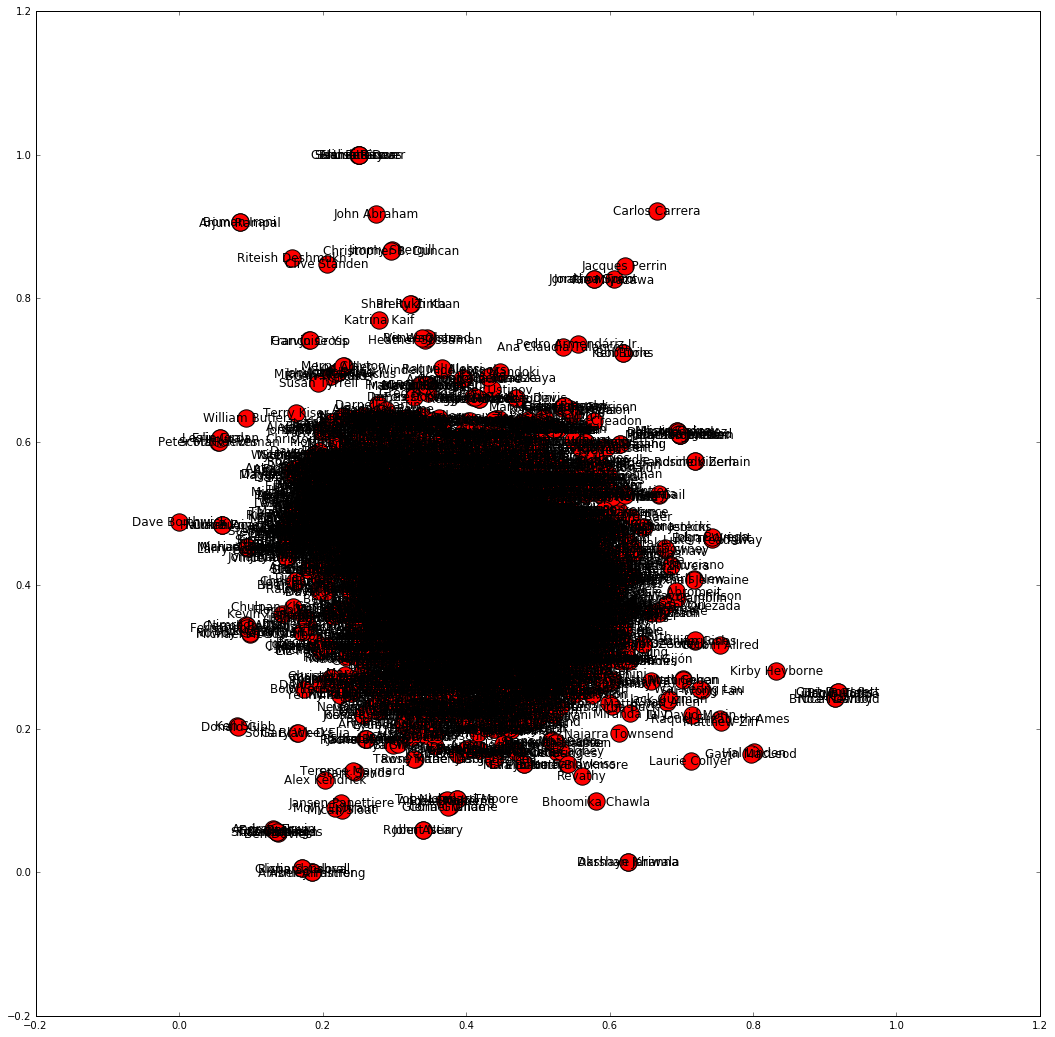

In [13]:
import matplotlib.pyplot as plt

#draw the graph/hairball
pos=nx.spring_layout(actnet) 
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(actnet, pos, width=weights, edge_color=weights)
plt.show()

In [14]:
# computing an affiliation network of the graphs
dirnet=bi.weighted_projected_graph(g, directors, ratio=False)

In [15]:
#find the largest connected component
dirnet= list(nx.connected_component_subgraphs(dirnet))
dirnet = dirnet[0]


In [16]:
#plot the network and highlight relationship strength using color and thickness. since the edge value will vary 
#widely (amount of money grossed in box office) we will use the logarithm

weights=[math.log(edata['weight']) for f, t, edata in dirnet.edges(data=True)]

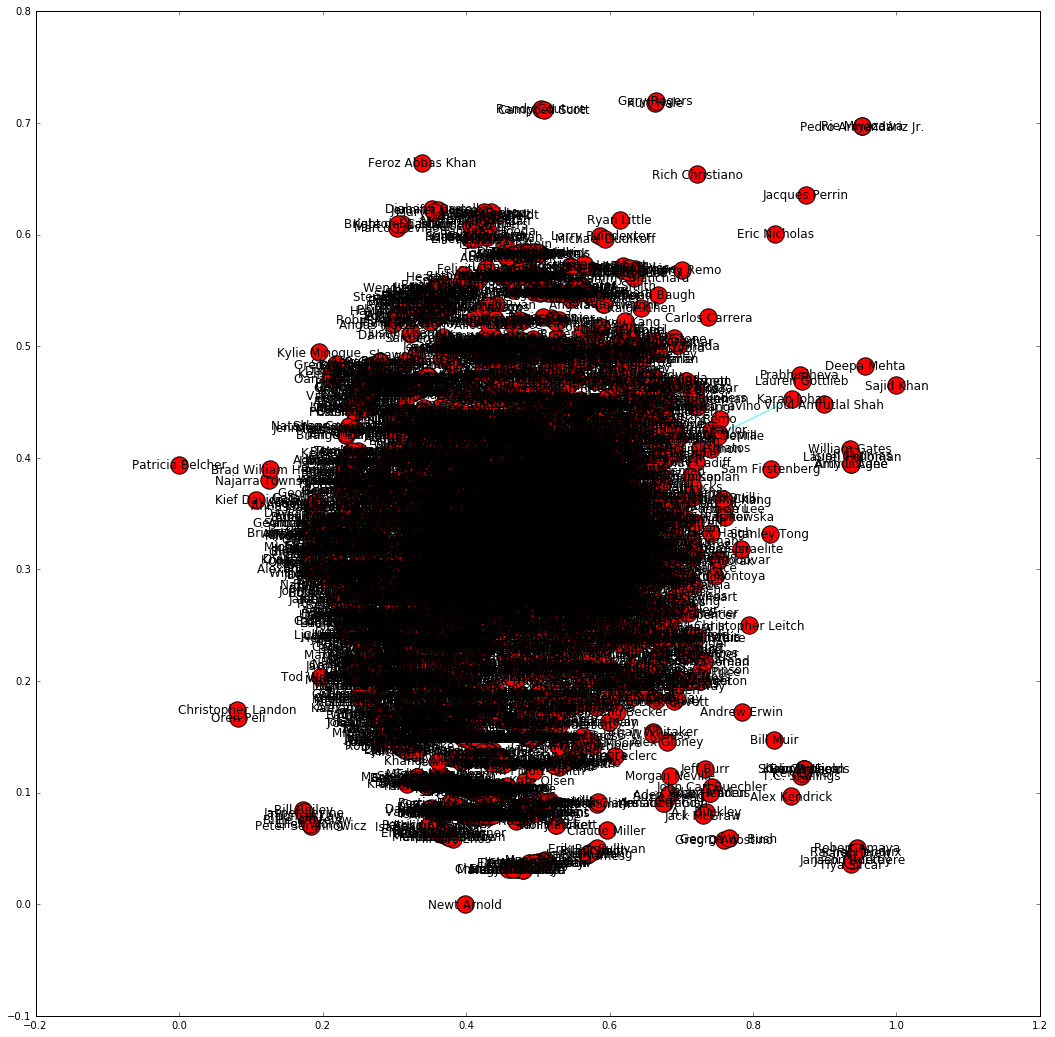

In [17]:
pos=nx.spring_layout(dirnet) 
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(dirnet, pos, width=weights, edge_color=weights)
plt.show()

(array([  3.37760000e+04,   0.00000000e+00,   0.00000000e+00,
          1.73000000e+03,   0.00000000e+00,   2.42000000e+02,
          0.00000000e+00,   3.60000000e+01,   1.30000000e+01,
          4.00000000e+00]),
 array([ 0.        ,  0.19459101,  0.38918203,  0.58377304,  0.77836406,
         0.97295507,  1.16754609,  1.3621371 ,  1.55672812,  1.75131913,
         1.94591015]),
 <a list of 10 Patch objects>)

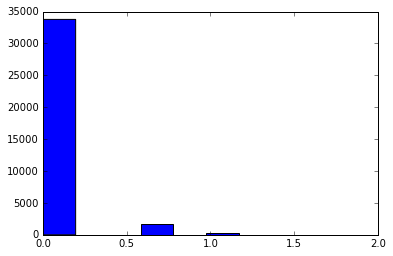

In [18]:
plt.hist(weights)

In [32]:
#we can use the islands method. with the plot above we can see that the majority of edges are weighted below 0.9, 
#so we can remove them using the island method from chapter 4 in the book

def trim_edges(g, weight=0.9):
    g2=nx.Graph()
    for f, to , edata in g.edges(data=True):
        if edata['weight']> weight:
            g2.add_edge(f,to,edata)
    return g2
    plot.hist(weights)
    

In [33]:
#the weights histogram is logarithmic, we should compute the original weight
dir_trim=trim_edges(dirnet, weight=math.exp(0.9))

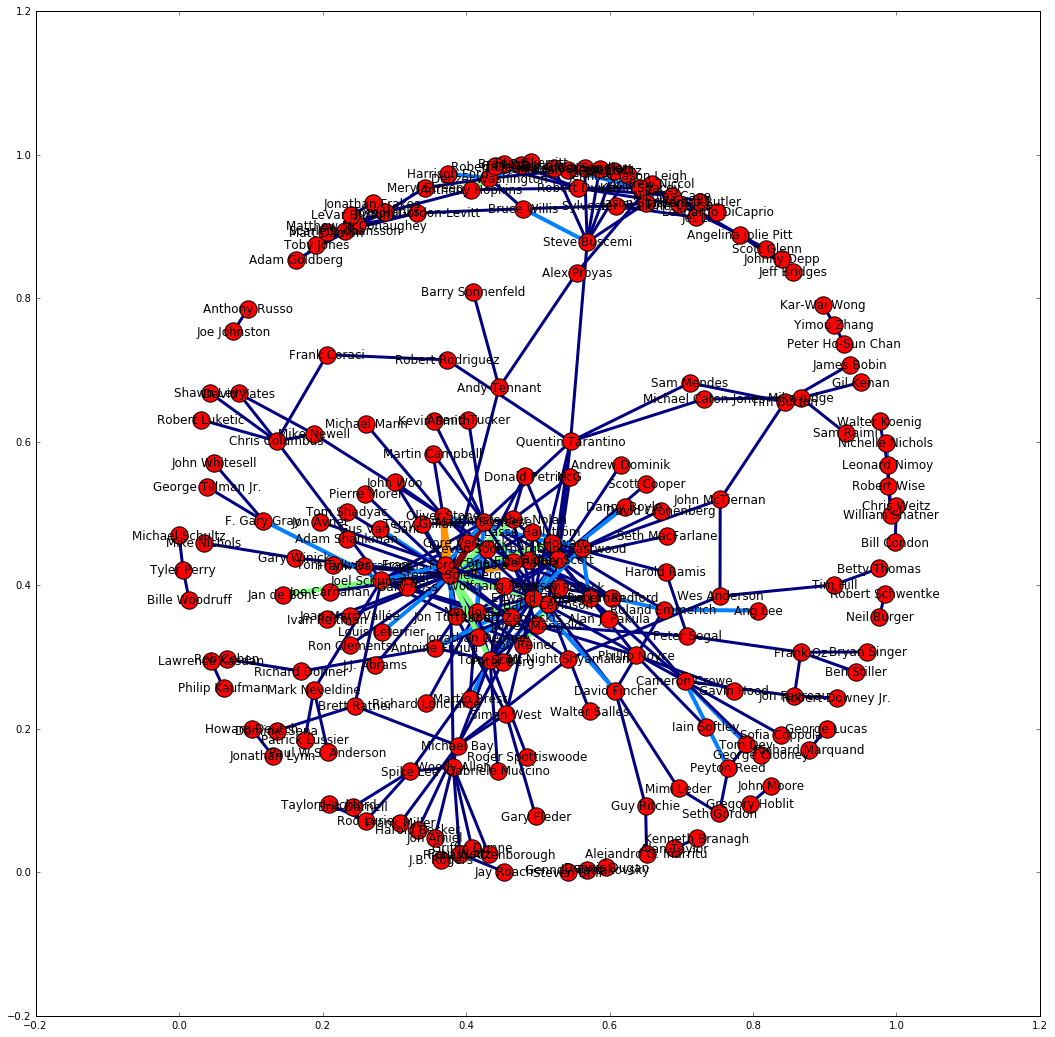

In [34]:
#recalculate weights based on the new graph
weights=[edata['weight'] for f, t, edata in dir_trim.edges(data=True)]
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(dir_trim, width=weights, edge_color=weights)
plt.show()

In [35]:
#the weights histogram is logarithmic, we should compute the original weight
act_trim=trim_edges(actnet, weight=math.exp(0.9))

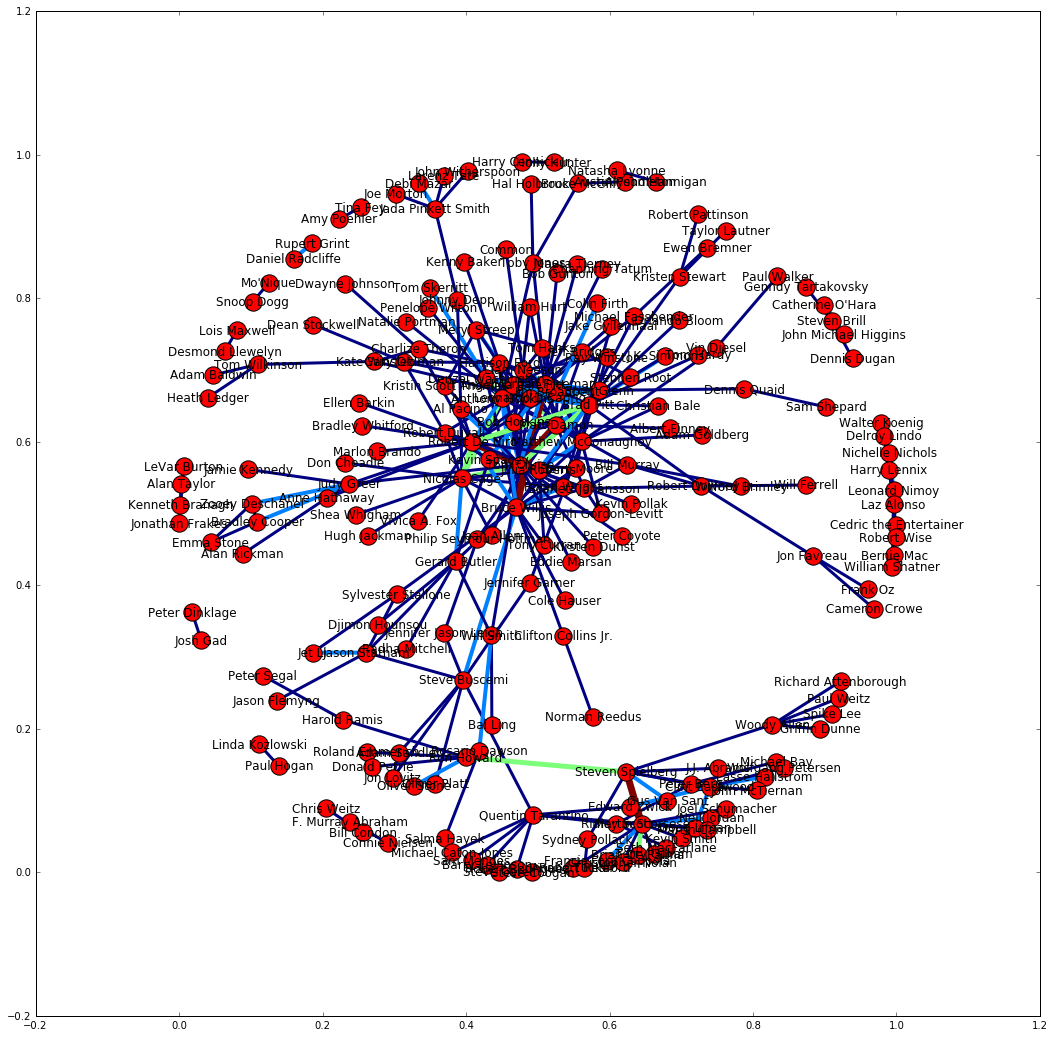

In [36]:
#recalculate weights based on the new graph
weights=[edata['weight'] for f, t, edata in act_trim.edges(data=True)]
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(act_trim, width=weights, edge_color=weights)
plt.show()

In [24]:
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

### There appears to be two main cliques (one much larger than the other), one appears to have more comedic actors/blockbusters and one has the more serious roles . The top money makers will be shown by their weights. I'm unsure what went wrong, but I seem to have some directors who are in my actors, and not just the ones who often star in their movies, most notably Stephen Spielberg. There don't seem to be too many, but I am not sure what went wrong

In [37]:
ega = nx.eigenvector_centrality(act_trim)
ega = sorted_map(ega)
ega[0:11]

[('Tom Cruise', 0.40544747208345755),
 ('Robert De Niro', 0.3200602171010921),
 ('Matt Damon', 0.31065201355281014),
 ('Brad Pitt', 0.28857719441258894),
 ('Morgan Freeman', 0.27498734650962803),
 ('Anthony Hopkins', 0.26842989438373493),
 ('Bruce Willis', 0.23910378182193123),
 ('Leonardo DiCaprio', 0.23304422660584562),
 ('Nicolas Cage', 0.20514644654393044),
 ('Liam Neeson', 0.19276828063072662),
 ('Harrison Ford', 0.1653888590764366)]

In [38]:
#most connections to other big name actors through a common director
dca = nx.degree_centrality(act_trim)
dca = sorted_map(dca)
dca[0:11]

[('Tom Cruise', 0.12745098039215685),
 ('Brad Pitt', 0.09803921568627451),
 ('Robert De Niro', 0.09803921568627451),
 ('Matt Damon', 0.08823529411764705),
 ('Anthony Hopkins', 0.0784313725490196),
 ('Bruce Willis', 0.0784313725490196),
 ('Morgan Freeman', 0.0784313725490196),
 ('Martin Scorsese', 0.06862745098039216),
 ('Matthew McConaughey', 0.06862745098039216),
 ('Nicolas Cage', 0.06862745098039216),
 ('Liam Neeson', 0.06372549019607843)]

In [39]:
bwa = nx.betweenness_centrality(act_trim)
bwa = sorted_map(bwa)
bwa[0:11]

[('Steve Buscemi', 0.2652458793021205),
 ('Bruce Willis', 0.2544824046419693),
 ('Quentin Tarantino', 0.24500627837341832),
 ('Martin Scorsese', 0.17582504266074245),
 ('Tom Cruise', 0.12555589239176052),
 ('Steven Spielberg', 0.11281110145207503),
 ('Robert De Niro', 0.09990936260541333),
 ('Brad Pitt', 0.09574346996934155),
 ('Anthony Hopkins', 0.06417670663687884),
 ('Matthew McConaughey', 0.05002220391664201),
 ('Morgan Freeman', 0.049334095924542146)]

#### The centrality measures show who we would expect to garner the most attention from directors and star in high grossing movies and are also in very different kinds of movies, ranging from comedy to serious roles. Or in the case of Nicholas Cage, someone who will take any movie that is offered to him! Steve Buscemi has been in some very different kinds of movies over the years and is someone who has therefore worked with a lot of directors in different genres, so it is not surprising that he has directors in common with many other prolific actors.

In [48]:
#One last narrower look 
act_trim2=trim_edges(actnet, weight=math.exp(1.1))

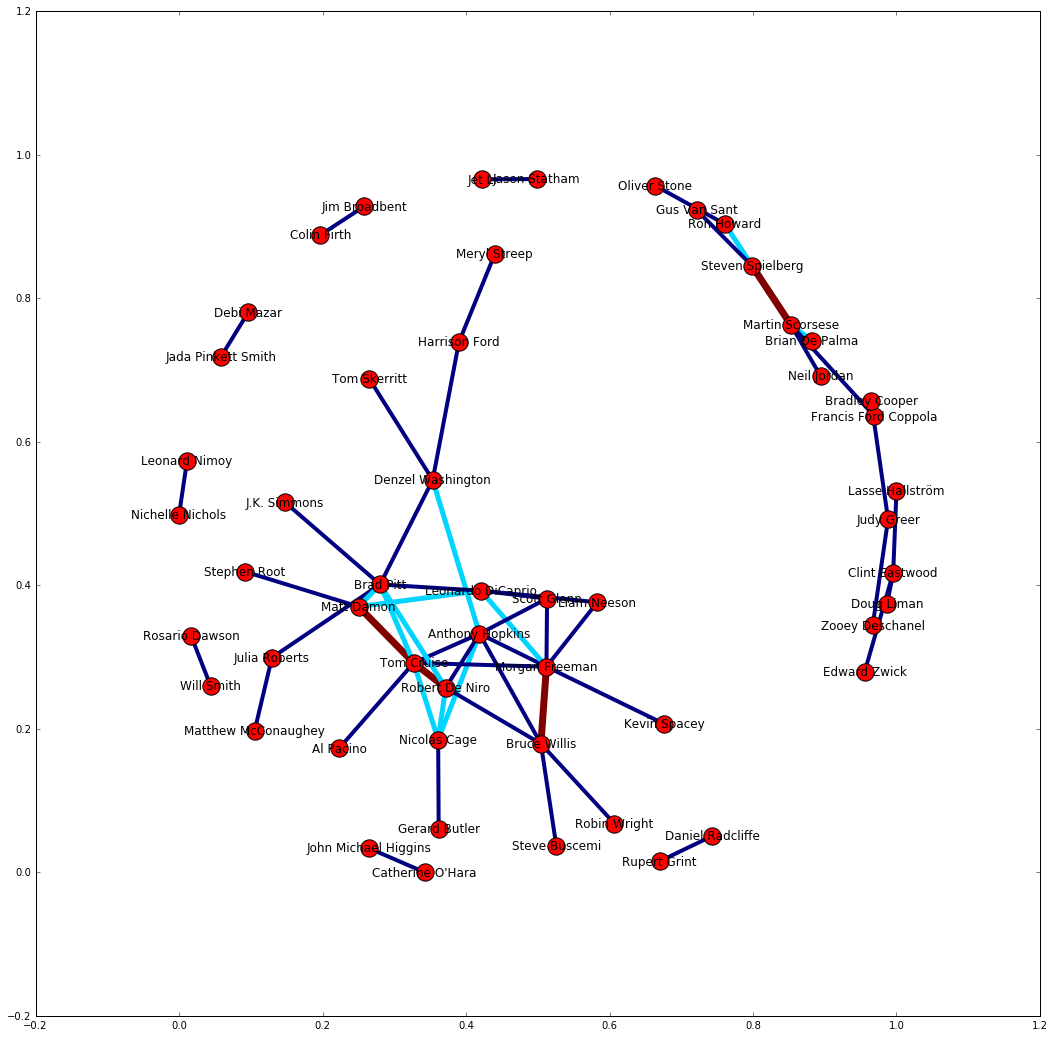

In [49]:
weights=[edata['weight'] for f, t, edata in act_trim2.edges(data=True)]
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(act_trim2, width=weights, edge_color=weights)
plt.show()

In [50]:
ega2 = nx.eigenvector_centrality(act_trim2)
ega2 = sorted_map(ega2)
ega2[0:11]

[('Tom Cruise', 0.45288989929825474),
 ('Robert De Niro', 0.36963604723879884),
 ('Anthony Hopkins', 0.35628850093972353),
 ('Brad Pitt', 0.3215266540557929),
 ('Morgan Freeman', 0.3166185482032461),
 ('Matt Damon', 0.26584300425160023),
 ('Nicolas Cage', 0.2650135351224614),
 ('Bruce Willis', 0.23766074304550572),
 ('Leonardo DiCaprio', 0.22692040012707868),
 ('Scott Glenn', 0.15691278541411047),
 ('Denzel Washington', 0.1425355727346305)]

#### Tom Skeritt and Scott Glenn stand out as being slightly surprising, but they have been part of some highly grossing movies, depsite typically not being the leading actors. There are also significantly more men than women